In [1]:
#import needed libraries
import pandas as pd        # dataframes
import numpy as np         # arrays, math
import re                  # regex
import nltk                # NLP tools
import string              # text ops
import random              # random ops
import matplotlib.pyplot as plt   # plots
from wordcloud import WordCloud, STOPWORDS  # word cloud
from nltk.corpus import stopwords           # stopwords
from nltk.stem import WordNetLemmatizer     # lemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF
from collections import Counter   # word counts
import seaborn as sns             # stats plots
from sklearn.model_selection import train_test_split   # split data
from sklearn.pipeline import Pipeline                  # pipeline
from sklearn.linear_model import LogisticRegression    # logistic reg
from sklearn.svm import SVC                            # SVM
from sklearn.metrics import (classification_report, confusion_matrix,accuracy_score, f1_score, silhouette_score)  # metrics
from sklearn.decomposition import TruncatedSVD         # LSA
from sklearn.cluster import KMeans                     # clustering
import joblib                                          # save/load model
from sklearn.metrics.pairwise import cosine_similarity # cosine sim
import warnings                                        # warnings
warnings.filterwarnings('ignore')                      # ignore warnings
import os                                              # file ops
from PyPDF2 import PdfReader                           # read PDFs
from docx import Document                              # read Word docs
from PIL import Image                                  # images
import pytesseract                                     # OCR

In [2]:
#reading the dataset
df=pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
#information summary about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [4]:
#statistical summary
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [5]:
#check null values
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [6]:
#check duplicates
df[df.duplicated(subset=["Resume"], keep=False)]

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


- since there are many duplicates, we will keep them for the data balance

In [8]:
#retrieving the first resume
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [9]:
# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")
# nltk.download("omw-1.4")
# nltk.download('punkt_tab') 

In [10]:
#data cleaning
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def cleanresume(txt):
    cleantxt = txt.lower()
    cleantxt = re.sub(r'http\S+\s', ' ', cleantxt)          # URLs
    cleantxt = re.sub(r'@\S+', ' ', cleantxt)               # @mentions
    cleantxt = re.sub(r'#\S+\s', ' ', cleantxt)             # hashtags
    cleantxt = re.sub(r'RT|cc', ' ', cleantxt)              # retweets/cc
    cleantxt = re.sub(r'[%s]' % re.escape("""!"#$%&''()*+,_./:;<=>?@[]^-`{!}~"""), ' ', cleantxt)
    cleantxt = re.sub(r'[^\x00-\x7f]', ' ', cleantxt)       # non-ASCII
    cleantxt = re.sub(r'\s+', ' ', cleantxt)                # extra spaces
    cleantxt = re.sub(r'\d+', ' ', cleantxt)                # digits
    cleantxt = re.sub(r'\s+', ' ', cleantxt).strip()        # cleanup
    
    # Tokenize
    tokens = nltk.word_tokenize(cleantxt)
    # Lemmatize + remove stopwords + filter short words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]
    
    return " ".join(tokens)


In [11]:
#applying the data cleaning on the original data
df['cleaned_resume'] = df['Resume'].apply(cleanresume)

In [12]:
#retrieving the first 5 rows of the data frame after cleaning
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may uit rgpv data scienti...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill python sap hana tableau sap hana sql sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


In [13]:
# create stopwords set
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])

totalWords =[]#to store all valid words

# get cleaned text sentences from dataframe
Sentences = df['cleaned_resume'].values 

# join all sentences into one string
cleanedSentences = " ".join(Sentences)

# tokenize each sentence and collect words
for records in Sentences:
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        # keep word if not stopword or punctuation
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

# get word frequency distribution
wordfreqdist = nltk.FreqDist(totalWords)
# top 50 most common words
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('project', 4071), ('exprience', 3829), ('company', 3639), ('month', 3344), ('detail', 3132), ('description', 3122), ('team', 2159), ('data', 2156), ('skill', 2067), ('management', 2024), ('system', 1954), ('database', 1533), ('year', 1515), ('client', 1462), ('maharashtra', 1449), ('application', 1394), ('service', 1380), ('technology', 1370), ('testing', 1349), ('test', 1297), ('requirement', 1274), ('business', 1273), ('report', 1246), ('development', 1204), ('server', 1202), ('developer', 1200), ('ltd', 1177), ('customer', 1172), ('process', 1166), ('less', 1145), ('responsibility', 1137), ('using', 1124), ('sql', 1121), ('january', 1090), ('java', 1076), ('engineering', 1055), ('work', 1038), ('pune', 1026), ('role', 969), ('user', 916), ('software', 901), ('education', 898), ('operation', 895), ('pvt', 879), ('sale', 845), ('activity', 832), ('environment', 800), ('design', 786), ('technical', 767), ('india', 762)]


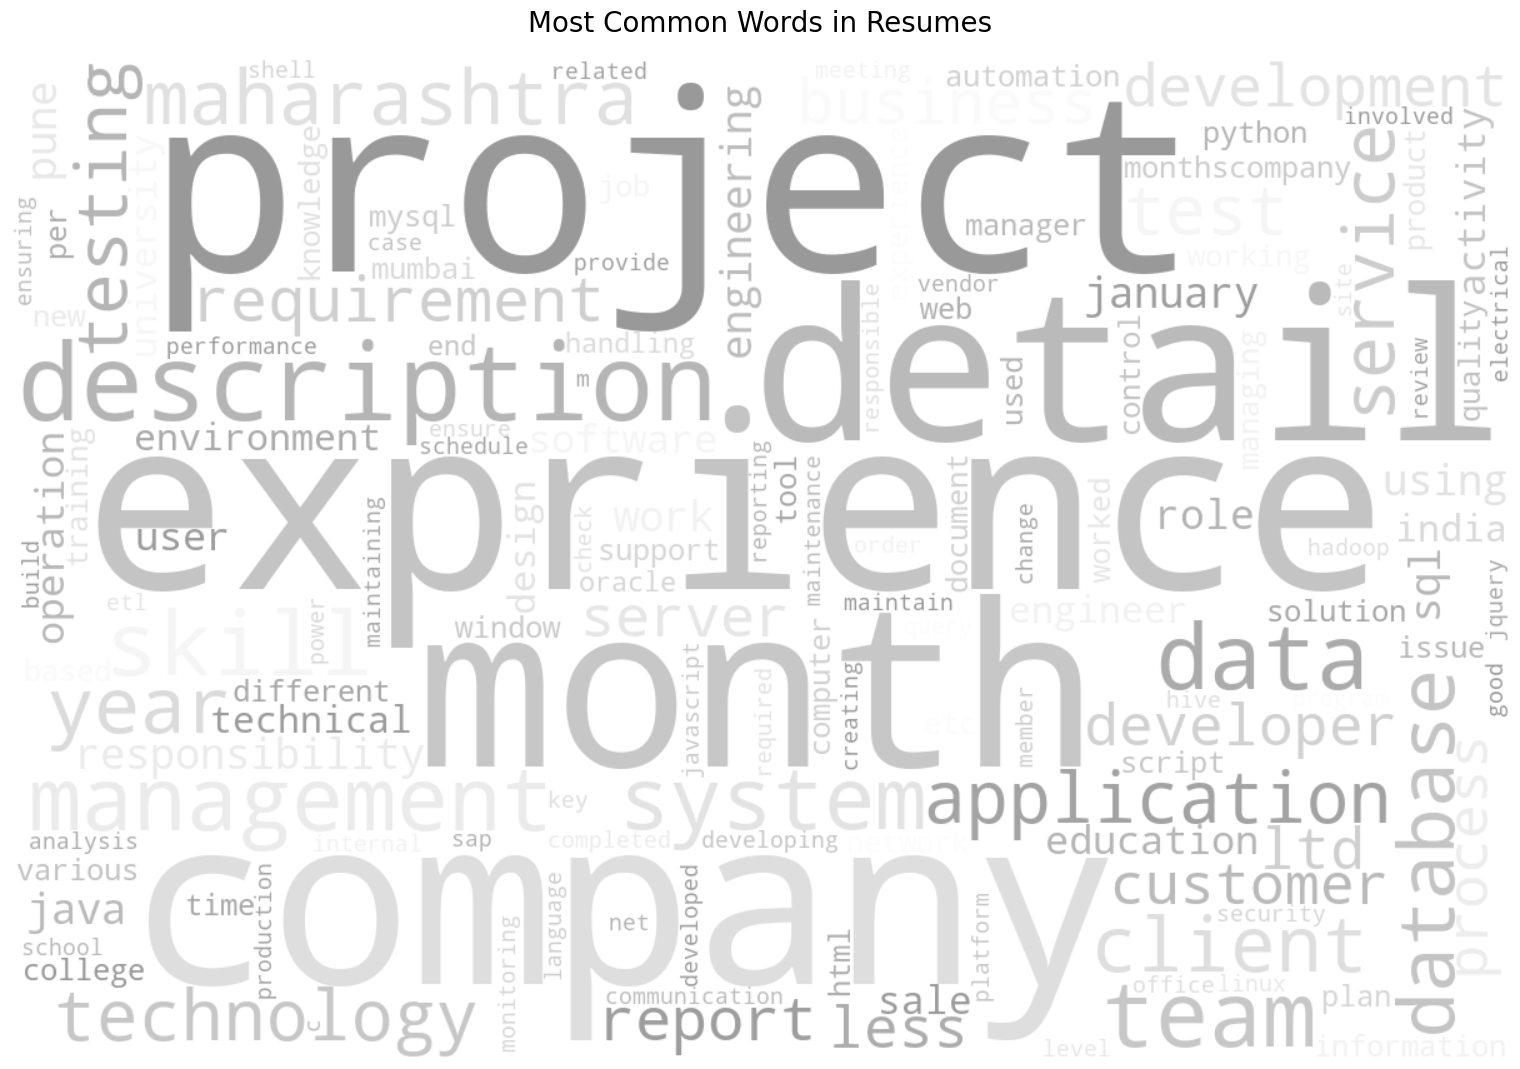

In [14]:
# Function to generate colors
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

# Create a more visually appealing word cloud
all_words = " ".join(df['cleaned_resume'])
wc = WordCloud(
    background_color='white',
    max_words=150,
    width=1200,
    height=800,
    prefer_horizontal=0.8,
    collocations=False,
    min_font_size=10,
    max_font_size=200,
    random_state=42,
    contour_width=1,
    contour_color='steelblue',
    colormap='viridis'
).generate(all_words)

# Plot with improved layout
plt.figure(figsize=(16, 10))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most Common Words in Resumes", fontsize=20, pad=20)
plt.show()

In [15]:
df['cleaned_resume'].values

array(['skill programming language python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch j dc j plotly kibana matplotlib ggplot tableau others regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep learning education detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience month jquery exprience month python exprience monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist elerating review process run analytics generate report cor

In [16]:
#count the values of category column
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

 statistical analysis. 

In [18]:
print("Number of resumes:", df.shape[0])  # total resumes
print("Number of unique categories:", df['Category'].nunique())  # distinct categories
print("Most common category:", df['Category'].value_counts().idxmax())  # top category
print("Average length of resumes (after cleaning):", df['cleaned_resume'].apply(len).mean())  # avg text length


Number of resumes: 962
Number of unique categories: 25
Most common category: Java Developer
Average length of resumes (after cleaning): 2441.238045738046


Most required skills


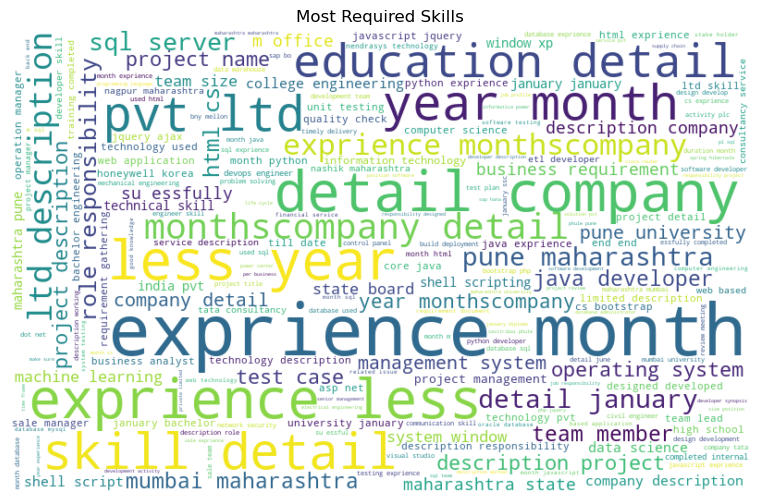

In [20]:
# combine all resumes into one string
all_words = " ".join(df['cleaned_resume'])  

# generate word cloud from text
wordcloud = WordCloud(width=800, height=500, background_color="white").generate(all_words)

# plot the word cloud
plt.figure(figsize=(12,6))  
plt.imshow(wordcloud, interpolation="bilinear")  # display image
plt.axis("off")  # remove axis
plt.title("Most Required Skills")  # title
plt.show()  # show plot

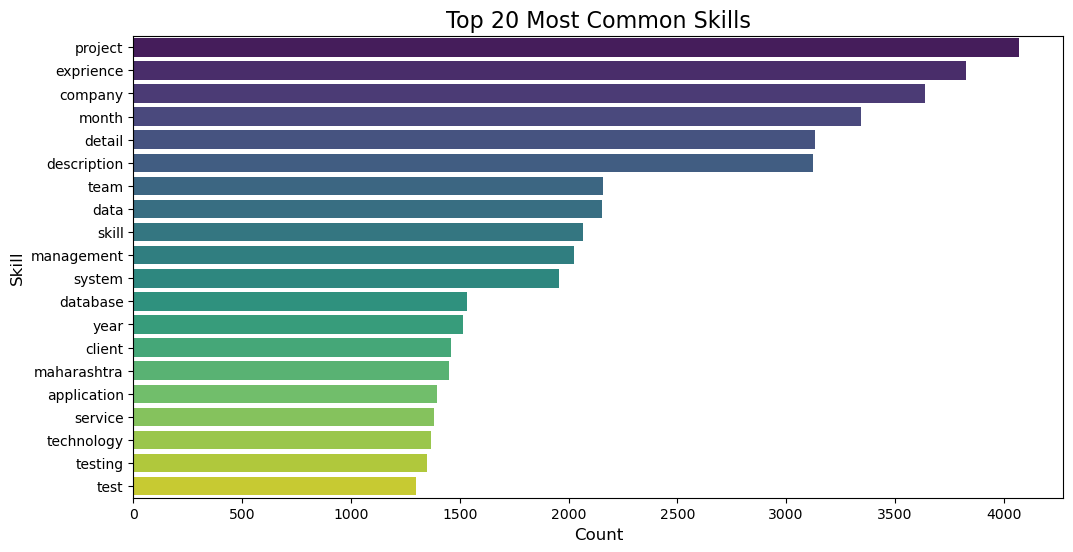

In [21]:
# split all resumes into individual words
all_words = " ".join(df['cleaned_resume']).split()  

# get top 20 most common words
most_common = Counter(all_words).most_common(20)  

# separate words and their counts
skills, counts = zip(*most_common)  

# plot bar chart of top 20 skills
plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(skills), palette="viridis")
plt.title("Top 20 Most Common Skills", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Skill", fontsize=12)
plt.show()

Distribution of jobs by category

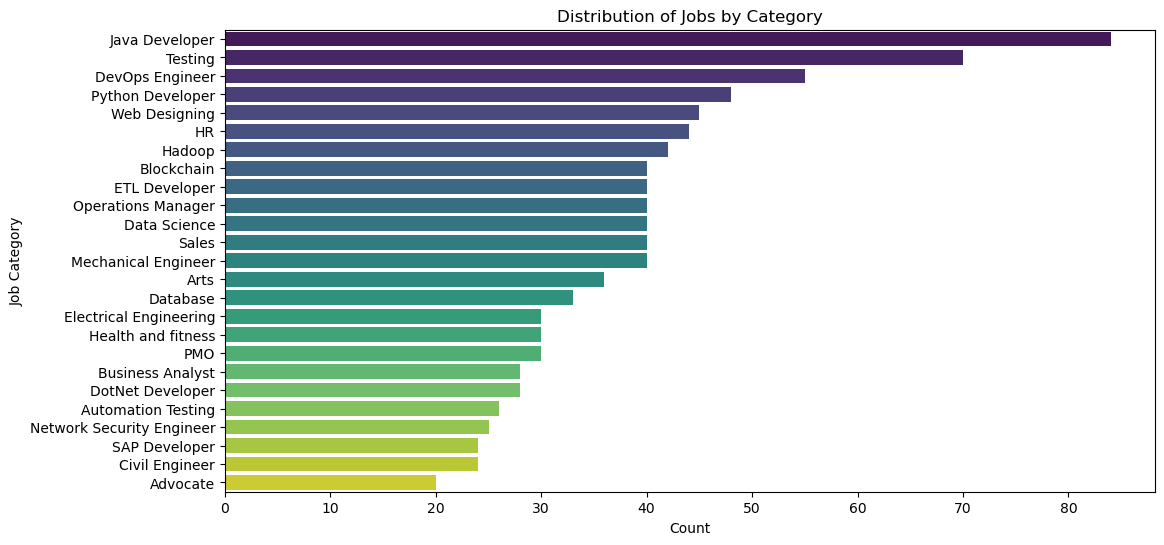

In [23]:
# plot job category distribution
plt.figure(figsize=(12,6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette="viridis")
plt.title("Distribution of Jobs by Category")
plt.xlabel("Count")
plt.ylabel("Job Category")
plt.show()


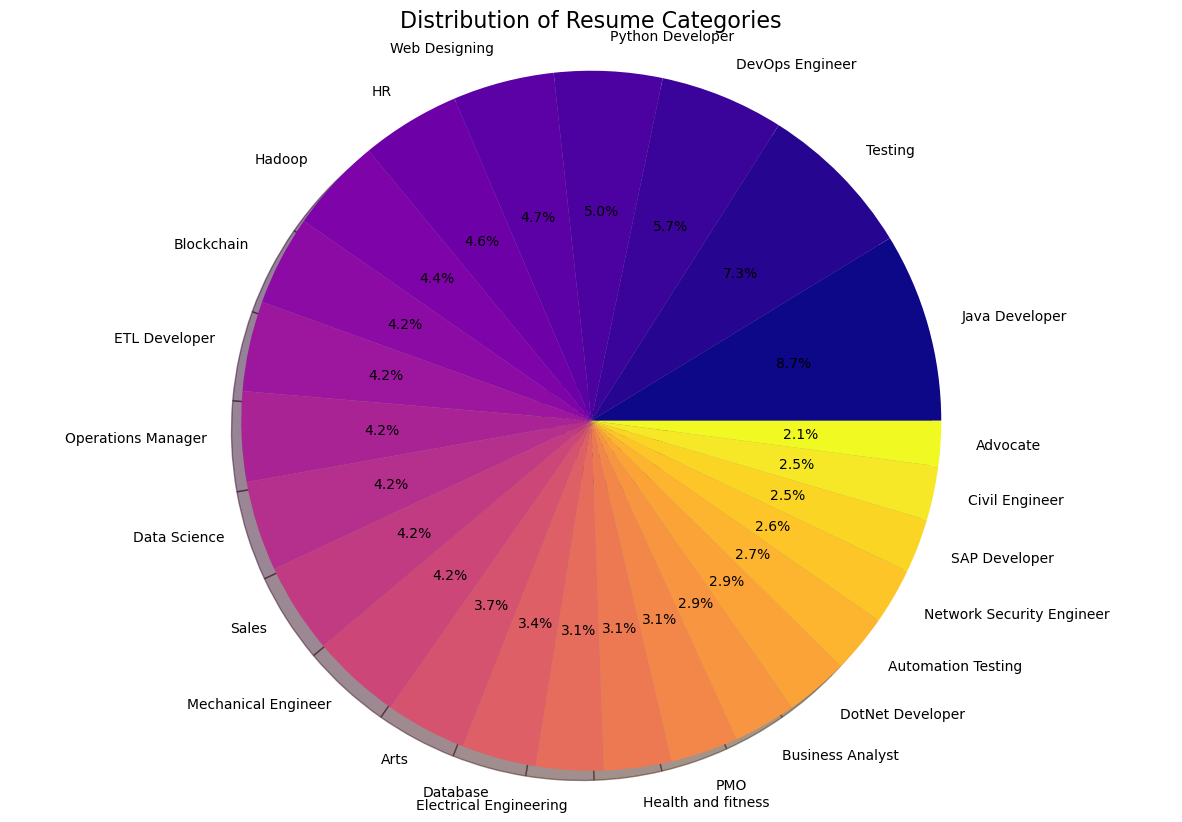

In [24]:
# get counts of each job category
counts = df['Category'].value_counts()
labels = counts.index #retrieve category names

# plot pie chart
plt.figure(figsize=(15, 10))
plt.pie(counts, labels=labels, autopct='%1.1f%%', shadow=True,# show percentages
        colors=plt.cm.plasma(np.linspace(0, 1, len(labels))))  

plt.title("Distribution of Resume Categories", fontsize=16)
plt.axis('equal') 
plt.show()

In [25]:
# function to preprocess resumes with TF-IDF
def preprocessing_res():
    tfidf = TfidfVectorizer(stop_words='english')# create TF-IDF vectorizer
    tfidf.fit(df['cleaned_resume'])
    X = tfidf.transform(df['cleaned_resume'])# convert resumes to TF-IDF vectors
    return X, tfidf


# Machine Learning Models

## 1) Career-Path Classification (predict Category from resume)

In [28]:
# Split the data
X, tfidf = preprocessing_res()
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

SVM Model

In [30]:
# Build and train the SVM model
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [31]:
# Evaluate the model
y_pred = svm_clf.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("SVM F1 (macro):", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred, zero_division=0))

SVM Accuracy: 0.9948186528497409
SVM F1 (macro): 0.9944588744588745
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00    

In [32]:
# Save model
joblib.dump(tfidf, 'tfidf.pkl')
joblib.dump(svm_clf, 'career_path_svm.pkl')
print("Model trained and saved successfully.")

Model trained and saved successfully.


Logistic Regression Model

In [34]:
# Build and train the Logistic Regression model
logreg_clf = LogisticRegression(
    max_iter=4000,
    n_jobs=-1,
    class_weight='balanced',
    random_state=42
)
logreg_clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=4000, n_jobs=-1,
                   random_state=42)

In [35]:
# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred = logreg_clf.predict(X_test)
print("LogReg Accuracy:", accuracy_score(y_test, y_pred))
print("SVM F1 (macro):", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred, zero_division=0))

LogReg Accuracy: 0.9948186528497409
SVM F1 (macro): 0.9944588744588745
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         4
                     Arts       1.00      1.00      1.00         7
       Automation Testing       0.83      1.00      0.91         5
               Blockchain       1.00      1.00      1.00         8
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         8
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00 

In [36]:
# Save model
joblib.dump(logreg_clf, 'career_path_logreg.pkl')
print("Model trained and saved successfully.")

Model trained and saved successfully.


In [37]:
def predict_career_path(text, model_path='career_path_svm.pkl', vec_path='tfidf.pkl', top_k=3):
    clf = joblib.load(model_path)     # the classifier
    vec = joblib.load(vec_path)       # the vectorizer
    Xq = vec.transform([text])        # transform raw text

    if hasattr(clf, 'predict_proba'):  # check if probabilities are available
        probs = clf.predict_proba(Xq)[0]
        classes = clf.classes_
        idx = np.argsort(probs)[::-1][:top_k]  # top-k highest probs
        return [(classes[i], f"{probs[i]*100:.2f}%") for i in idx]
    else:
        # fallback to decision_function or hard prediction
        scores = clf.decision_function(Xq).ravel()
        classes = clf.classes_
        idx = np.argsort(scores)[::-1][:top_k]
        return [(classes[i], float(scores[i])) for i in idx]

student_profile = "Python, SQL, Pandas, scikit-learn, data visualization"
print(predict_career_path(student_profile))

[('Data Science', '25.65%'), ('DevOps Engineer', '8.63%'), ('Python Developer', '7.27%')]


## 2) CV Clustering (group similar resumes)

In [39]:
# Vectorize once for unsupervised tasks
tfidf_unsup = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df=2, max_df=0.9)
X_tfidf = tfidf_unsup.fit_transform(df['cleaned_resume'])

# Dimensionality reduction for speed/stability (keep semantic signal)
svd = TruncatedSVD(n_components=100, random_state=42)
X_svd = svd.fit_transform(X_tfidf)

In [40]:
best_k, best_score, best_model = None, -1, None
for k in [8, 10, 12, 15, 20]:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(X_svd)
    score = silhouette_score(X_svd, labels, metric='euclidean')
    print(f"k={k} silhouette={score:.4f}")
    if score > best_score:
        best_k, best_score, best_model = k, score, km

print(f"Best k = {best_k} (silhouette={best_score:.4f})")
cluster_labels = best_model.predict(X_svd)

df_clusters = df[['Category', 'cleaned_resume']].copy()
df_clusters['cluster'] = cluster_labels

# Peek clusters
print(df_clusters.groupby('cluster')['Category'].agg(lambda s: s.value_counts().head(3)))
joblib.dump((tfidf_unsup, svd, best_model), 'cv_clustering_pipeline.pkl')


k=8 silhouette=0.0689
k=10 silhouette=0.0982
k=12 silhouette=0.0791
k=15 silhouette=0.1175
k=20 silhouette=0.0891
Best k = 15 (silhouette=0.1175)
cluster
0                6
1               10
2     [36, 30, 28]
3     [42, 36, 32]
4     [50, 40, 36]
5               10
6                9
7               10
8               17
9               10
10     [20, 17, 8]
11               8
12              17
13              10
14               8
Name: Category, dtype: object


['cv_clustering_pipeline.pkl']

In [41]:
def top_terms_per_cluster(vectorizer, svd_model, kmeans_model, n_terms=15):
    # Approximate terms for each cluster by averaging component weights
    terms = np.array(vectorizer.get_feature_names_out())

    # Project cluster centers back to tf-idf term space (approximate)
    # center in SVD space -> pseudo TF-IDF space via inverse transform
    centers_svd = kmeans_model.cluster_centers_
    centers_tfidf_approx = svd_model.inverse_transform(centers_svd)

    top = {}
    for i, center in enumerate(centers_tfidf_approx):
        idx = np.argsort(center)[::-1][:n_terms]
        top[i] = terms[idx]
    return top

tops = top_terms_per_cluster(tfidf_unsup, svd, best_model, n_terms=12)
for c, words in tops.items():
    print(f"Cluster {c}: {', '.join(words)}")


Cluster 0: aurus, aurus tech, java, tech pvt, bug, company aurus, meeting reviewed, design confirm, requirement consistently, confirm, code debugged, debugged
Cluster 1: report, sla, management, project, resource, billing, monitor, risk, responsible, maintain, utilization, operational report
Cluster 2: database, java, server, sql, exprience, net, month, jquery, developer, java developer, sql server, web
Cluster 3: data, hadoop, hive, exprience, etl, python, month, science, business, developer, java, project
Cluster 4: project, exprience, month, exprience month, january, electrical, sale, maharashtra, engineering, testing, team, management
Cluster 5: operation, prepaid, service, card, prepaid card, key contribution, ensuring, po, customer, email, pr, managing
Cluster 6: bootstrap php, size position, developer synopsis, synopsis, php jquery, sql team, position software, used, used sql, database used, used html, cs bootstrap
Cluster 7: freight, shipment, inventory, overseeing, operation, 

## 3) Simple Job Recommendation System

In [83]:
# Extract text from CV
def extract_text_from_cv(file_path):
    ext = os.path.splitext(file_path)[1].lower()
    text = ""

    if ext == ".pdf":
        with open(file_path, "rb") as f:
            reader = PdfReader(f)
            for page in reader.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text + " "

    elif ext == ".docx":
        doc = Document(file_path)
        text = " ".join([para.text for para in doc.paragraphs])

    elif ext == ".txt":
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()

    elif ext in [".jpg", ".jpeg", ".png"]:
        text = pytesseract.image_to_string(Image.open(file_path))

    else:
        raise ValueError(f"Unsupported file type: {ext}")

    return text.strip()


# Main: Recommend Jobs
def recommend_jobs(student_input, top_n=10, only_top_category=False,
                   clf_path='career_path_svm.pkl', tfidf_path='tfidf.pkl'):
    """
    Recommend jobs for a student given either raw text or a CV file path.

    Parameters:
        student_input (str): Raw resume text OR file path to a CV.
        top_n (int): Number of recommendations.
        only_top_category (bool): Filter results by top predicted category.
        clf_path (str): Path to trained SVM classifier.
        tfidf_path (str): Path to saved TF-IDF vectorizer.

    Returns:
        top_preds (list): Top predicted categories with probabilities.
        recommendations (DataFrame): Recommended resumes with similarities.
    """

    # If input is a file path, extract text
    if os.path.exists(student_input):
        student_text = extract_text_from_cv(student_input)
    else:
        student_text = student_input

    # Load model and vectorizer
    model = joblib.load(clf_path)
    tfidf = joblib.load(tfidf_path)

    # Vectorize student input
    vec_student = tfidf.transform([student_text])

    # Get prediction probabilities
    probs = model.predict_proba(vec_student)[0]
    classes = model.classes_

    # Sort top categories
    top_indices = np.argsort(probs)[::-1]
    top_preds = [(classes[i], f"{probs[i]*100:.2f}%") for i in top_indices[:3]]

    # Similarity search with dataset
    sims = cosine_similarity(vec_student, tfidf.transform(df['cleaned_resume'])).ravel()
    candidates = pd.DataFrame({
        'idx': np.arange(len(df)),
        'Category': df['Category'].values,
        'Similarity': sims
    })

    # If only_top_category, filter candidates
    if only_top_category:
        top_cat = classes[top_indices[0]]
        candidates = candidates[candidates['Category'] == top_cat]

    recs = candidates.sort_values('Similarity', ascending=False).head(top_n)

    # Collect output
    out = df.loc[recs['idx'], ['Category', 'Resume']].copy()
    out['Similarity'] = recs['Similarity'].values

    return top_preds, out.reset_index(drop=True)


# Example Usage
if __name__ == "__main__":
    # Option 1: From raw text
    student_profile = """
    Skills: Python, SQL, Pandas, scikit-learn, ML pipelines, NLP (TF-IDF, SVM),
    Tableau dashboards, feature engineering, model evaluation, A/B testing
    """
    # top_preds, recommendations = recommend_jobs(student_profile, top_n=5, only_top_category=True)

    # Option 2: From a file (PDF/DOCX/TXT/IMG)
    top_preds, recommendations = recommend_jobs("(Samaa Ayman Mohamed Shawky Turky)_ALX3_AIS2_S2 (1).pdf", top_n=5, only_top_category=True)

    print("Predicted categories (with probabilities):", top_preds)
    print(recommendations)


Predicted categories (with probabilities): [('Data Science', '41.52%'), ('DevOps Engineer', '7.03%'), ('Java Developer', '4.52%')]
       Category                                             Resume  Similarity
0  Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...    0.359094
1  Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...    0.359094
2  Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...    0.359094
3  Data Science  Skills â¢ Python â¢ Tableau â¢ Data Visuali...    0.359094
4  Data Science  Expertise â Data and Quantitative Analysis â...    0.303297
